In [6]:
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt

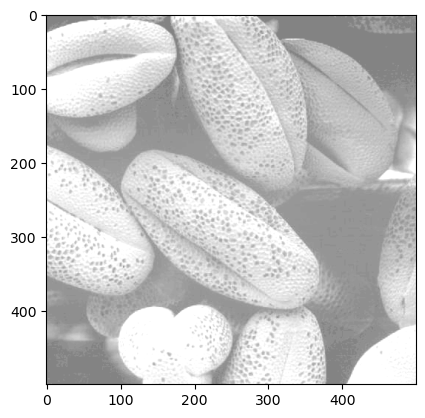

In [10]:
r = ski.io.imread('ch03/Fig0316_1.tif')
t, r[0, 0] = r[0, 0], 0
plt.imshow(r, cmap='gray')
r[0, 0] = t

In [11]:
def histogram(im):
    hist = np.zeros((256))
    row, col = im.shape
    for i in range(row):
        for j in range(col):
            hist[im[i, j]] += 1
            
    return hist

In [17]:
def equalizeHistogram(img):
    row, col = img.shape
    hist = histogram(img)
    
    hist = hist/(row*col)
    
    accum = np.zeros((256))
    accum[0] = hist[0]
    for i in range(1, 256):
        accum[i] = accum[i - 1] + hist[i]
        
    out = np.zeros((row, col))
    
    for i in range(row):
        for j in range(col):
            out[i, j] = accum[img[i, j]]
            
    out = np.floor(255*out + 0.5)
    return out

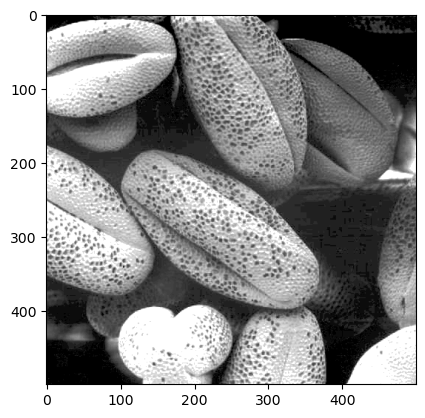

In [18]:
s = equalizeHistogram(r)
plt.imshow(s, cmap='gray')

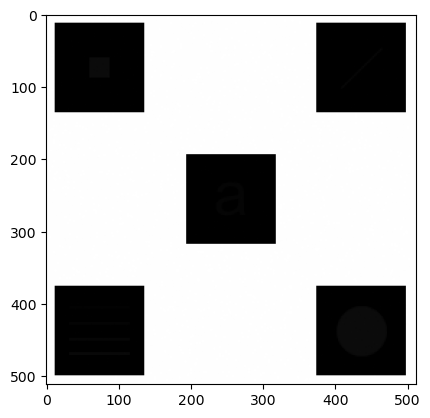

In [24]:
im = ski.io.imread('ch03/Fig0326.tif')
plt.imshow(im, cmap='gray')

In [26]:
list(set(im.ravel()))

[0, 1, 226, 227, 228, 3, 2, 7, 4, 5, 6, 10, 11, 9, 8]

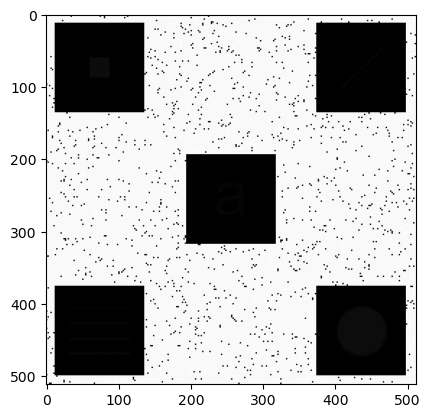

In [27]:
im2 = equalizeHistogram(im)
plt.imshow(im2, cmap='gray')

In [28]:
list(set(im2.ravel()))

[66.0, 68.0, 69.0, 70.0, 71.0, 75.0, 79.0, 250.0, 255.0]

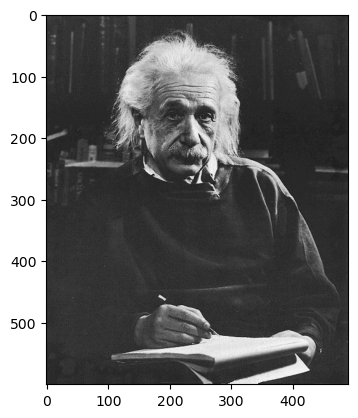

In [22]:
im = ski.io.imread('ch03/Fig0354.tif')
plt.imshow(im, cmap='gray')

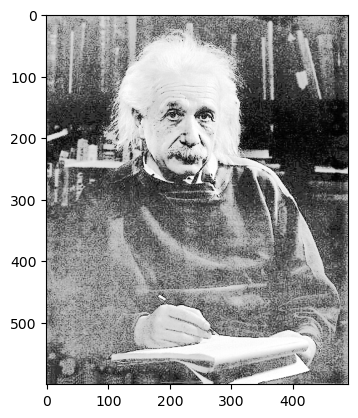

In [23]:
im2 = equalizeHistogram(im)
plt.imshow(im2, cmap='gray')